In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
file = "winemag-data_first150k.csv"

In [9]:
df = pd.read_csv(file)
df = df.drop("Unnamed: 0", axis=1)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
None
              points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000

In [10]:
mask = pd.notnull(df.country)
df.loc[mask]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [11]:
mask2 = pd.notnull(df.price)
clean_df = df.loc[mask & mask2].reset_index(drop=True)
clean_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [12]:
clean_df.country.value_counts()

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [13]:
mask3 = clean_df.country == "US-France"
clean_df.loc[mask3]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
130712,US-France,"Defies categorization, in more ways than one. ...",NaN,88,50.0,Santa Barbara County-Condrieu,NaN,NaN,Viognier,Deux C


In [14]:
top10 = clean_df.country.value_counts()[0:10].sort_values(ascending=True)

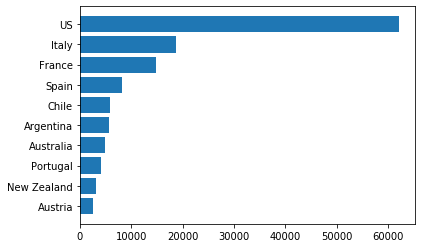

In [15]:
plt.barh(top10.index, top10.values)
plt.show()

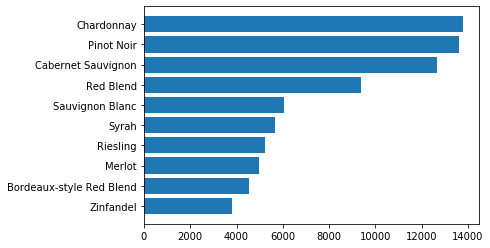

In [16]:
variety10 = clean_df.variety.value_counts()[0:10].sort_values(ascending=True)
plt.barh(variety10.index, variety10.values)
plt.show()

In [17]:
counts = clean_df.variety.value_counts()
counts

Chardonnay                13775
Pinot Noir                13625
Cabernet Sauvignon        12671
Red Blend                  9377
Sauvignon Blanc            6054
                          ...  
Syrah-Carignan                1
Xynisteri                     1
Carignan-Syrah                1
Caprettone                    1
Moscatel de Alejandría        1
Name: variety, Length: 619, dtype: int64

In [18]:
counts.to_csv("Wine.csv", index=True)

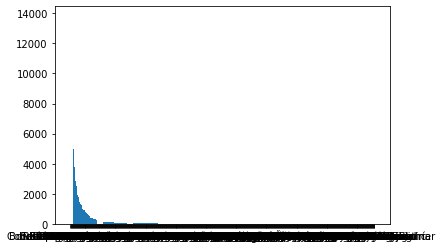

In [19]:
plt.bar(counts.index, counts.values)
plt.show()

In [27]:
reds = pd.read_csv('Wine_Reds.csv').dropna()
reds = reds.rename(columns = {"Variety":"variety"})
reds.head()

,variety,Counts,Red?
0,Chardonnay,13775,False
1,Pinot Noir,13625,True
2,Cabernet Sauvignon,12671,True
3,Red Blend,9377,True
4,Sauvignon Blanc,6054,False


In [36]:
temp = pd.merge(clean_df,reds,on = "variety", how = "left")
mask5 = pd.notnull(temp["Red?"])
wine_df = temp.loc[mask5].reset_index(drop=True)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True
